In [31]:
import re
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100, 'display.max_columns', 50)

In [2]:
!ls data/*.csv

data/sample_submission.csv  data/test.csv  data/train.csv


In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [4]:
display(df_train.head())

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [5]:
display(df_test.head())

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,493.15,N,Y,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,446.15,N,Y,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,370.10,N,N,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0


In [6]:
df_train.shape

(30000, 24)

In [7]:
df_test.shape

(20000, 23)

In [8]:
def cols_to_lower(columns):
    return ['_'.join(re.sub('[.-]', '', column).replace('(USD)', '').lower().strip().split()) for column in columns]

In [9]:
df_train.columns = cols_to_lower(df_train.columns)
df_test.columns = cols_to_lower(df_test.columns)

In [25]:
def unique_value_count(df):
    nunique_df = df.nunique().reset_index()
    nunique_df = nunique_df.rename(columns={'index': 'column', 0: 'num_unique'})
    return nunique_df

In [26]:
unique_value_count(df_train)

,column,num_unique
0,customer_id,30000
1,name,30000
2,gender,2
3,age,48
4,income,24429
5,income_stability,2
6,profession,8
7,type_of_employment,18
8,location,3
9,loan_amount_request,29982


In [28]:
unique_value_count(df_test)

,column,num_unique
0,customer_id,20000
1,name,20000
2,gender,2
3,age,48
4,income,18693
5,income_stability,2
6,profession,7
7,type_of_employment,18
8,location,3
9,loan_amount_request,19988


In [13]:
def missing_value_stats(df):
    num_rows = df.shape[0]
    # Missing value count by columns
    df_missing = df.isna().sum().reset_index()
    # Renaming columns
    df_missing.columns = ['column', 'missing_values']
    # Getting only those columns having missing values > 0
    df_missing = df_missing[df_missing['missing_values'] > 0]
    df_missing.reset_index(drop=True, inplace=True)
    # Calculating percentage of missing
    df_missing['missing_percentage'] = df_missing['missing_values'].apply(
        lambda missing_value: round((missing_value / num_rows) * 100, 2)
    )
    
    if df_missing.shape[0] > 0:
        return df_missing
    else:
        return "No nulls in the data"

In [14]:
missing_value_stats(df_train)

,column,missing_values,missing_percentage
0,gender,53,0.18
1,income,4576,15.25
2,income_stability,1683,5.61
3,type_of_employment,7270,24.23
4,current_loan_expenses,172,0.57
5,dependents,2493,8.31
6,credit_score,1703,5.68
7,has_active_credit_card,1566,5.22
8,property_age,4850,16.17
9,property_location,356,1.19


In [15]:
missing_value_stats(df_test)

,column,missing_values,missing_percentage
0,gender,31,0.15
1,income,750,3.75
2,income_stability,813,4.06
3,type_of_employment,4689,23.45
4,current_loan_expenses,83,0.41
5,dependents,1142,5.71
6,credit_score,743,3.72
7,has_active_credit_card,1076,5.38
8,property_age,892,4.46
9,property_location,160,0.80


In [32]:
df_train[df_train.gender.isna()]

,customer_id,name,gender,age,income,income_stability,profession,type_of_employment,location,loan_amount_request,current_loan_expenses,expense_type_1,expense_type_2,dependents,credit_score,no_of_defaults,has_active_credit_card,property_id,property_age,property_type,property_location,coapplicant,property_price,loan_sanction_amount
1095,C-13881,Sherwood Abbott,NaN,19,5002.91,NaN,Commercial associate,Managers,Semi-Urban,263939.86,736.19,N,Y,1.0,NaN,1,Unpossessed,744,5002.91,4,Semi-Urban,1,490050.55,184757.90
1211,C-36542,Stephaine Ferber,NaN,50,1880.45,Low,Working,Drivers,Rural,41182.62,333.09,Y,N,2.0,693.34,1,Active,691,1880.45,4,Rural,1,68239.88,28827.83
2092,C-39265,Aleta Gregoire,NaN,61,2427.46,High,Pensioner,NaN,Semi-Urban,86585.93,400.69,N,Y,1.0,867.82,0,Active,571,2427.46,2,Urban,0,136287.92,69268.74
2964,C-9424,Alva Beauchesne,NaN,18,3188.73,Low,Commercial associate,NaN,Urban,27444.59,136.24,N,N,1.0,797.76,0,Inactive,927,3188.73,4,Rural,1,40899.77,19211.21
4216,C-38459,Silas Deford,NaN,65,2728.97,High,Pensioner,NaN,Semi-Urban,63132.91,420.87,N,Y,2.0,849.88,0,Inactive,963,2728.97,1,Rural,0,101911.82,44193.04
4424,C-28882,Nana Mccleery,NaN,60,2648.28,High,Pensioner,NaN,Semi-Urban,106323.64,311.04,Y,Y,2.0,806.75,0,Unpossessed,632,2648.28,3,Urban,1,181045.39,79742.73
5148,C-7517,Sherie Puente,NaN,34,1233.27,Low,Commercial associate,Core staff,Semi-Urban,144397.54,416.23,N,Y,2.0,846.37,0,Unpossessed,680,1233.27,1,Semi-Urban,1,192306.56,108298.16
5433,C-9812,Vera Clubb,NaN,18,NaN,Low,Working,Sales staff,Semi-Urban,108606.43,460.91,N,Y,2.0,721.82,0,Active,408,NaN,1,Urban,1,134510.54,-999.00
6300,C-11377,Adolfo Kinch,NaN,47,2592.45,Low,State servant,NaN,Semi-Urban,62085.35,497.68,Y,Y,1.0,771.33,0,Active,430,2592.45,4,Rural,1,105541.85,49668.28
6853,C-6091,Perry Howey,NaN,32,4394.39,Low,Commercial associate,Managers,Semi-Urban,110486.24,432.55,Y,Y,3.0,802.93,0,Unpossessed,840,4394.39,1,Rural,1,149051.29,88388.99


In [39]:
df_train[df_train['name'].str.contains('Peele')]

,customer_id,name,gender,age,income,income_stability,profession,type_of_employment,location,loan_amount_request,current_loan_expenses,expense_type_1,expense_type_2,dependents,credit_score,no_of_defaults,has_active_credit_card,property_id,property_age,property_type,property_location,coapplicant,property_price,loan_sanction_amount
315,C-16617,Setsuko Peele,F,57,4506.43,Low,State servant,NaN,Semi-Urban,94795.17,1022.01,Y,Y,NaN,865.58,0,Active,972,4506.43,3,Rural,1,117839.32,66356.62
1325,C-47505,Brandon Peele,F,58,2445.37,Low,Commercial associate,NaN,Urban,138418.26,551.99,N,Y,4.0,743.83,0,Unpossessed,616,2445.37,1,Semi-Urban,1,168958.38,0.00
1551,C-46557,Mason Peele,M,47,4623.68,Low,Working,Drivers,Semi-Urban,45388.51,436.88,Y,N,4.0,688.53,0,Active,99,4623.68,1,Urban,1,59875.19,0.00
1552,C-49004,Reyna Peele,M,21,1669.95,Low,Working,Cooking staff,Rural,82075.82,510.41,N,Y,4.0,740.22,0,Active,812,1669.95,3,Semi-Urban,1,136587.67,0.00
1941,C-26556,Santina Peele,F,26,NaN,Low,State servant,Core staff,Semi-Urban,74820.22,517.76,N,N,1.0,NaN,0,Unpossessed,844,NaN,4,Rural,1,112166.26,48633.14
3120,C-1227,Delmer Peele,F,36,2548.92,Low,Working,Security staff,Semi-Urban,75062.36,356.53,Y,Y,1.0,647.47,0,Unpossessed,494,2548.92,2,Urban,1,116655.05,0.00
3796,C-22183,Verna Peele,F,18,2783.08,Low,Commercial associate,Sales staff,Semi-Urban,50725.46,407.05,N,N,1.0,689.43,0,Active,257,2783.08,4,Urban,1,55853.00,32971.55
4151,C-19777,Bulah Peele,F,58,2588.53,NaN,Working,High skill tech staff,Semi-Urban,96521.82,325.65,Y,Y,4.0,863.62,0,Unpossessed,791,2588.53,1,Rural,1,107716.54,72391.37
7093,C-45409,Darlena Peele,F,37,2149.70,Low,Working,High skill tech staff,Semi-Urban,228876.14,661.61,N,Y,2.0,795.14,1,Active,837,2149.70,1,Semi-Urban,0,300682.26,0.00
7582,C-49325,Ying Peele,F,34,1856.75,Low,Commercial associate,Sales staff,Semi-Urban,70462.00,623.66,Y,Y,1.0,842.59,0,NaN,322,1856.75,3,Semi-Urban,0,109602.82,0.00


In [37]:
df_train[df_train['type_of_employment'] == 'Managers']

,customer_id,name,gender,age,income,income_stability,profession,type_of_employment,location,loan_amount_request,current_loan_expenses,expense_type_1,expense_type_2,dependents,credit_score,no_of_defaults,has_active_credit_card,property_id,property_age,property_type,property_location,coapplicant,property_price,loan_sanction_amount
7,C-11006,Clarinda Montana,F,45,NaN,Low,State servant,Managers,Semi-Urban,240311.77,807.64,N,N,2.0,812.26,0,Active,314,NaN,2,Urban,1,401040.70,168218.24
27,C-44863,Gerard Forsman,F,18,5350.94,Low,Commercial associate,Managers,Semi-Urban,99492.44,516.71,Y,Y,2.0,733.68,0,Inactive,344,5350.94,3,Rural,0,188950.33,0.00
39,C-24451,Margareta Wind,M,18,7885.56,Low,Commercial associate,Managers,Urban,121963.50,587.80,Y,Y,1.0,721.18,1,Unpossessed,530,7885.56,1,Urban,1,142645.25,85374.45
41,C-48527,Mana Chattin,F,54,5330.72,Low,Working,Managers,Semi-Urban,133531.81,535.77,N,N,1.0,861.21,1,Active,467,5330.72,2,Urban,1,170214.99,100148.86
45,C-47362,Elke Vitolo,F,27,1960.17,Low,Working,Managers,Semi-Urban,123034.46,684.16,N,N,3.0,715.43,0,Inactive,270,1960.17,2,Rural,0,169416.28,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29927,C-17534,Maudie Lubinski,M,23,NaN,Low,Working,Managers,Semi-Urban,155990.45,490.37,Y,Y,1.0,NaN,0,Active,901,NaN,1,Urban,1,-999.00,109193.32
29929,C-48835,Jena Volkmann,M,23,2194.89,Low,Working,Managers,Urban,113591.86,415.06,N,N,3.0,689.03,0,Active,631,2194.89,3,Semi-Urban,1,139248.94,0.00
29986,C-36230,Krystin Weir,M,32,8308.27,Low,Commercial associate,Managers,Urban,75696.52,418.60,Y,Y,3.0,784.91,0,Inactive,816,8308.27,3,Semi-Urban,1,106908.58,52987.56
29994,C-7813,Jocelyn Deschamp,M,39,2250.19,Low,Commercial associate,Managers,Rural,83810.38,430.66,Y,Y,3.0,NaN,0,Inactive,265,2250.19,3,Urban,1,129028.33,62857.78


In [33]:
df_train['gender'].value_counts()

M    15053
F    14894
Name: gender, dtype: int64

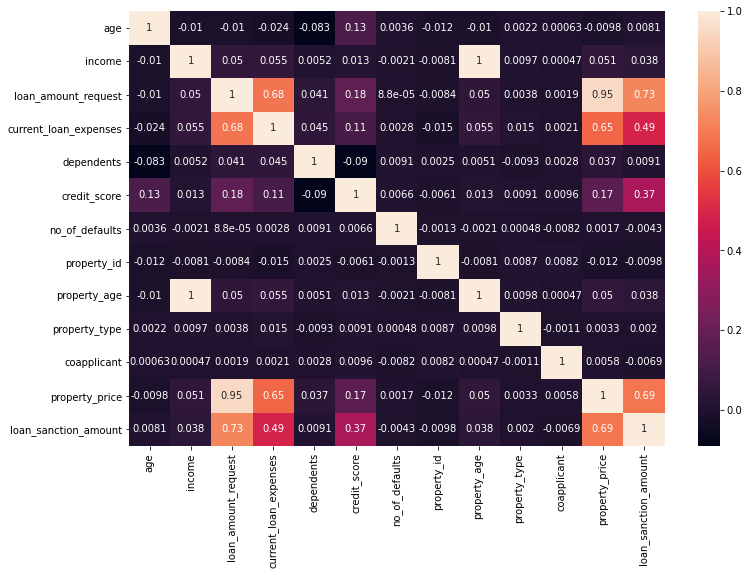

In [36]:
plt.figure(figsize=(12, 8))

sns.heatmap(df_train.corr(), annot=True)
plt.show()